# DCGAN in Python with Pretrained weights

Pretrained DCGANs for:
* Landscapes
* Portraits
* Nude Portraits

## Setup

Dependencies:

* NVIDIA GPU
* NVIDIA CUDA drivers and tools
* Python 3.6
* Libraries: 
  * Torch
  * Torch Vision
  * PIllow




In [1]:
# check for python installation
!python --version

Python 3.6.6


In [2]:
# check for nvidia cuda tools
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Tue_Jun_12_23:07:04_CDT_2018
Cuda compilation tools, release 9.2, V9.2.148


In [3]:
# install pytorch for python3.6 via pip, torchvision and pillow
!pip3 install torch torchvision Pillow

    100% |████████████████████████████████| 519.5MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x59574000 @  0x7fddf97ae2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 61kB 21.3MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.


## Verify Installation

In [4]:
# verify pytorch is running and using the gpu
import torch
x = torch.rand(2, 2)
print(x)
print('is gpu:', torch.cuda.is_available())

tensor([[0.0271, 0.1350],
        [0.9061, 0.3171]])
is gpu: True


## Download Pre-trained weights

In [0]:
# code to download a file from gdrive
def download_file_from_drive(file_id, download_path):
  # download and save 
  !wget --quiet --load-cookies /tmp/cookies.txt \
  "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \
  "https://drive.google.com/uc?export=download&id=$file_id" -O- | \
  sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$file_id" \
  -O $download_path && rm -rf /tmp/cookies.txt

In [0]:
# download the selected generater image weights 
image_to_generate = "portrait" #@param ["landscape", "portrait", "nude_portrait"]
# download weights and model 
landscape_gan_generator_weights_cpu_drive_id = '1HqoHuH1cefPN1A9i6j_CjbCuoQy_hpG1' # google drive id for generators weights
nudeportraits_gan_generator_weights_cpu_drive_id = '1WfGaeEMNgMp355J194NnfRr8TqHSlvVd'
portraits_gan_generator_weights_cpu_drive_id = '1Ul9poUdKBSdyb6IAJlSXBP8zVOVpzHBT'
selected_option_id = ''
if image_to_generate == 'landscape':
  selected_option_id = landscape_gan_generator_weights_cpu_drive_id
elif image_to_generate == 'portrait':
  selected_option_id = portraits_gan_generator_weights_cpu_drive_id
elif image_to_generate == 'nude_portrait':
  selected_option_id = nudeportraits_gan_generator_weights_cpu_drive_id 

download_file_from_drive(selected_option_id, 'dcgan_g_cpu.t7')

## Convert and Run the DCGAN Model 

In [0]:
# import necessary libraries
import numpy as np
from torch.legacy.nn import SpatialFullConvolution
from torch.utils.serialization import load_lua
from PIL import Image
from IPython.display import Image as DisplayImage

In [0]:
# code to load legacy lua models in artDCGAN
def replace_module(module, check_fn, create_fn):
    if not hasattr(module, 'modules'):
        return
    if module.modules is None:
        return
    for i in range(len(module.modules)):
        m = module.modules[i]
        if check_fn(m):
            module.modules[i] = create_fn(m)
        replace_module(m, check_fn, create_fn)

def fix_full_conv(m):
    m.finput = None
    m.fgradInput = None
    m.bias = None
    return m

def load_torch_model(path):
    model = load_lua(path, unknown_classes=True)
    replace_module(
        model,
        lambda m: isinstance(m, SpatialFullConvolution),
        fix_full_conv
    )
    return model

Loading model
Model loading done
Running model

First generated image:


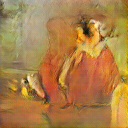

In [10]:
# code to run and display output from dcgan 
import os
batch_size = 5
nz = 100
output_folder = './gen_samples'
if not os.path.isdir(output_folder):
  os.makedirs(output_folder)
print("Loading model")
model = load_torch_model("dcgan_g_cpu.t7").cuda()
print("Model loading done")

z_batch = torch.randn(batch_size, nz, 1, 1).cuda()

print("Running model")
out_batch = model.forward(z_batch)
for i, img in enumerate(out_batch):
  img = img.detach()
  tarray = ((0.5 + 0.5 * img.cpu().view(3,128,128).numpy()) * 256).astype(np.uint8)
  im = Image.fromarray(tarray.transpose(1, 2, 0))
#   print('Image generated: %d, now saving' % i) 
  im.save(output_folder + '/sample_' + str(i) + '.png')
#   print('Saved image %d' % i)
print("\nFirst generated image:")
DisplayImage(os.path.join(output_folder, os.listdir(output_folder)[0]))

## Generated Images

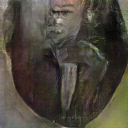

In [11]:
DisplayImage(os.path.join(output_folder, os.listdir(output_folder)[1]))

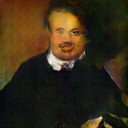

In [12]:
DisplayImage(os.path.join(output_folder, os.listdir(output_folder)[2]))

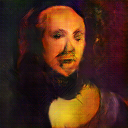

In [13]:
DisplayImage(os.path.join(output_folder, os.listdir(output_folder)[3]))

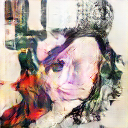

In [14]:
DisplayImage(os.path.join(output_folder, os.listdir(output_folder)[4]))